# Display image and saliency map

## Introduction
This is a small notebook to show images and generated saliency maps

Requires pandas, matplotlib, numpy, torch, torchvision

You need imagenet validation files (ILSVRC2012_devkit_t12.tar.gz & ILSVRC2012_img_val.tar) in an "imagenet" folder, and the npz of the method you want to show in a "npz" folder.


In [1]:
import pandas as pd
from os import path
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import torch
from torchvision.datasets.imagenet import ImageNet
from torchvision import transforms

In [3]:
val_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
        ])

## Parameters and method selection

In [4]:
# (Un)comment methods here

#method = "smoothgrad"
method = "rise"
#method = "integratedgrad"

model = "resnet50"
dataset_name = "imagenet"
npz_folder = "npz"
datasets_root = "../input"
indices_csv = "2000idx_ILSVRC2012.csv"

In [5]:
npz_name = method + "_" + model + "_" + dataset_name + ".npz"

In [6]:
saliencies_maps = np.load(path.join(npz_folder, npz_name))['arr_0']

In [7]:
dataset = ImageNet(path.join(datasets_root, dataset_name), split='val', transform=val_transforms)
subset_indices = pd.read_csv(indices_csv, header=None)[0].to_numpy()
dataset = torch.utils.data.Subset(dataset, subset_indices)

## Select and show image and map

In [8]:
# Change idx from 0 to 2000 to select an image
idx = 0

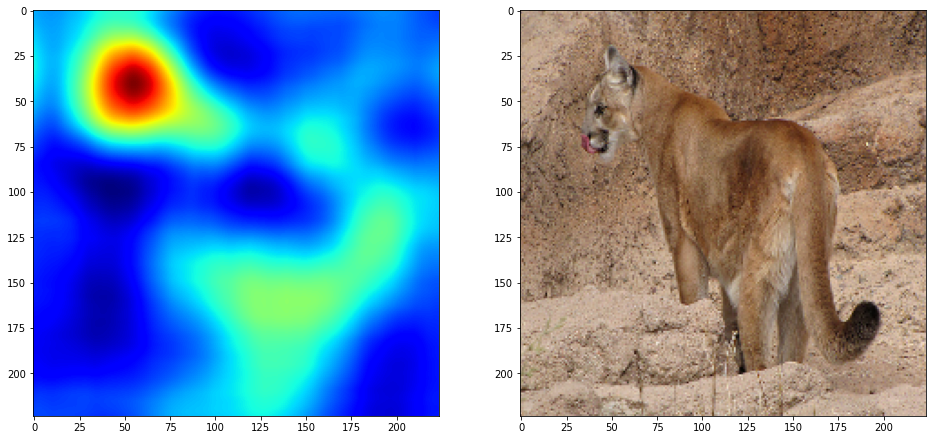

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].imshow(saliencies_maps[idx][0], cmap="jet")
ax[1].imshow(dataset[idx][0].transpose(0,2).transpose(0,1), cmap="turbo")